In [8]:

import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [67]:
print(x_train[0])
padded_x_train = pad_sequences(x_train, padding='post', maxlen=100)
padded_x_test = pad_sequences(x_test, padding='post', maxlen=100)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [68]:
print(padded_x_train)
print(padded_x_test)
print(padded_x_train.shape)
print(padded_x_test.shape)

[[1415   33    6 ...   19  178   32]
 [ 163   11 3215 ...   16  145   95]
 [1301    4 1873 ...    7  129  113]
 ...
 [  11    6 4065 ...    4 3586    2]
 [ 100 2198    8 ...   12    9   23]
 [  78 1099   17 ...  204  131    9]]
[[   1  591  202 ...    0    0    0]
 [   6  976 2078 ...  125    4 3077]
 [   4 5673    7 ...    9   57  975]
 ...
 [   1   13 1408 ...    0    0    0]
 [   1   11  119 ...    7  470    0]
 [  56   96  346 ...   34 2005 2643]]
(25000, 100)
(25000, 100)


In [69]:
model = Sequential([
    Embedding(10000, 16, input_length = 100),
    GlobalAveragePooling1D(),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 160,577
Trainable params: 160,577
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(
    optimizer = 'adam',
    loss =  'binary_crossentropy',
    metrics = ['accuracy']
)

In [72]:
model.fit(padded_x_train, y_train, epochs = 10, batch_size = 32, validation_data = (padded_x_test, y_test))

Epoch 1/10
782/782 [==============================] - 5s 5ms/step - loss: 0.4889 - accuracy: 0.7825 - val_loss: 0.3478 - val_accuracy: 0.8482
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2862 - accuracy: 0.8795 - val_loss: 0.3303 - val_accuracy: 0.8543
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2349 - accuracy: 0.9056 - val_loss: 0.3455 - val_accuracy: 0.8523
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2040 - accuracy: 0.9214 - val_loss: 0.3738 - val_accuracy: 0.8466
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1801 - accuracy: 0.9320 - val_loss: 0.4050 - val_accuracy: 0.8414
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1611 - accuracy: 0.9422 - val_loss: 0.4390 - val_accuracy: 0.8363
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1452 - accuracy: 0.9490 - val_loss: 0.4791 - val_accuracy: 0.8333
Epoch 

In [73]:
loss, accuracy = model.evaluate(padded_x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.6141 - accuracy: 0.8202


## New review testing

In [74]:
custom_reviews = [
    "This movie was absolutely fantastic! The acting was great, and the story was very engaging.",
    "I hated this movie. The plot was boring, and the characters were uninteresting.",
    "It was an okay film. Some parts were good, but overall it was just average.",
    "One of the best movies I have ever watched! Highly recommend it.",
    "Worst movie of the year. I regret wasting my time on it."
]

In [86]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts([' '.join([str(word) for word in review]) for review in x_train])

In [87]:
sequences = tokenizer.texts_to_sequences(custom_reviews)
sequences_padded = pad_sequences(sequences, padding='post', maxlen=100)

In [88]:
padded_sequences = tokenize_reviews(custom_reviews, word_index)

In [89]:
for i, review in enumerate(custom_reviews):
    sentiment = "Positive" if predictions[i] > 0.5 else "Negative"
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: This movie was absolutely fantastic! The acting was great, and the story was very engaging.
Predicted Sentiment: Negative

Review: I hated this movie. The plot was boring, and the characters were uninteresting.
Predicted Sentiment: Negative

Review: It was an okay film. Some parts were good, but overall it was just average.
Predicted Sentiment: Negative

Review: One of the best movies I have ever watched! Highly recommend it.
Predicted Sentiment: Negative

Review: Worst movie of the year. I regret wasting my time on it.
Predicted Sentiment: Negative



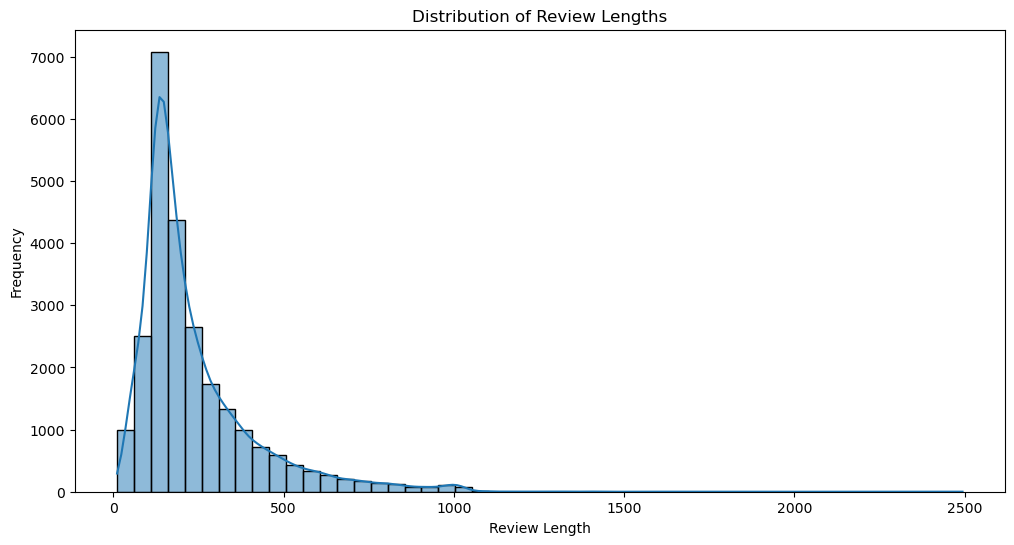

In [9]:
review_lengths = [len(review) for review in x_train]
plt.figure(figsize=(12, 6))
sns.histplot(review_lengths, bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


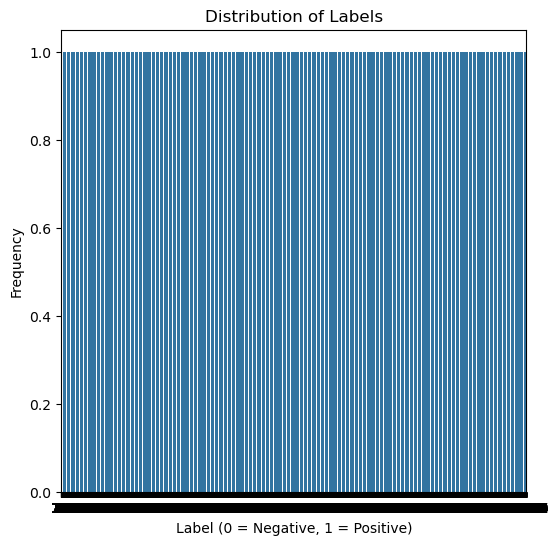

In [11]:
plt.figure(figsize=(6, 6))
sns.countplot(y_train)
plt.title('Distribution of Labels')
plt.xlabel('Label (0 = Negative, 1 = Positive)')
plt.ylabel('Frequency')
plt.show()